# Finding Outliers

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define our Data-set
data = np.random.randint(10, size=15)
outliers = np.random.randint(150, size=5)
dataset = np.concat((data, outliers))
dataset

array([  2,   4,   8,   0,   0,   7,   2,   2,   7,   3,   9,   9,   3,
         7,   9,   0,  22,  28, 116, 119])

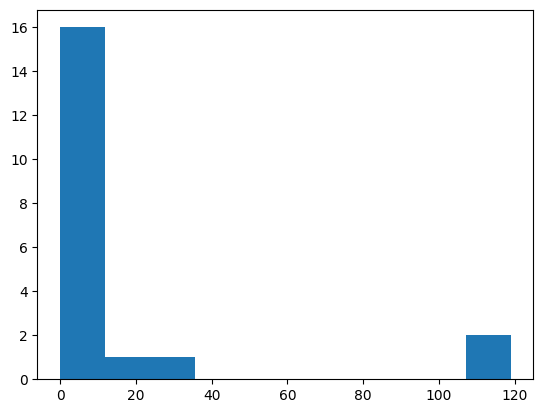

In [3]:
plt.hist(dataset)
plt.show()

## Fingind Outliers

### Z-Score Method

In [4]:
def detact_outliers(data):
    dtc_outliers = []
    thrashold = 1
    mean = data.mean()
    std = data.std()
    for i in data:
        z_score = (i-mean)/std
        if np.abs(z_score)>thrashold:
            dtc_outliers.append(i)
    return dtc_outliers

In [5]:
detact_outliers(dataset)

[np.int64(116), np.int64(119)]

### IQR Method

1. Sort Data
2. Calculate Q1(25%) and Q3(75%)
3. IQR (Q3 - Q1)
4. Lower fence and Heigher fence

In [6]:
# shortind data
data = np.short(dataset)
data

array([  2,   4,   8,   0,   0,   7,   2,   2,   7,   3,   9,   9,   3,
         7,   9,   0,  22,  28, 116, 119], dtype=int16)

In [7]:
Q1, Q3 = np.quantile(data,[0.25,0.75])
Q1, Q3

(np.float64(2.0), np.float64(9.0))

In [8]:
IQR = Q3 - Q1
IQR

np.float64(7.0)

In [9]:
Lower_fence = Q1 - (1.5*IQR)
heigher_fence = Q3 + (1.5*IQR)
Lower_fence, heigher_fence

(np.float64(-8.5), np.float64(19.5))

In [10]:
dtc_outliers = []
for i in data:
    if (i<Lower_fence) | (i>heigher_fence):
        dtc_outliers.append(i)
dtc_outliers

[np.int16(22), np.int16(28), np.int16(116), np.int16(119)]

### Conclusion

* The accuracy of the Z-score method exhibits significant sensitivity to the chosen threshold limit.
* Conversely, the IQR (Interquartile Range) method employs mathematically derived lower and upper fence limits to identify outliers, offering a more robust and objective approach.